In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [8]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [9]:
#read data
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'sales'}, inplace=True)

In [10]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [11]:
df_ice_cream.set_index('date', inplace=True)

In [12]:
start_date= pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream.loc[start_date:]

In [13]:
df_ice_cream.shape

(121, 1)

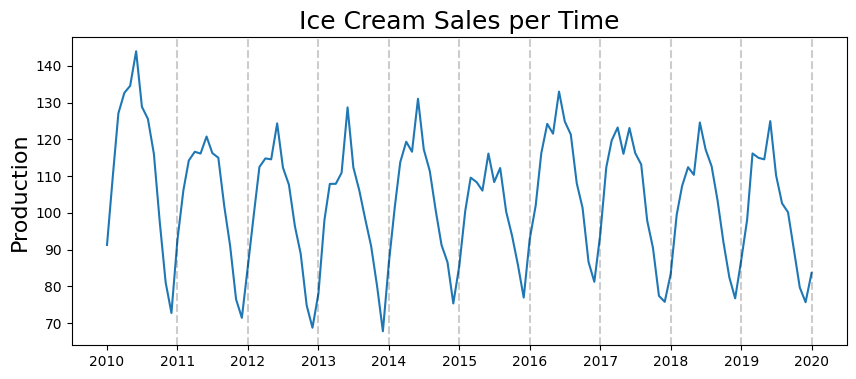

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.sales)
plt.title('Ice Cream Sales per Time', fontsize=18)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


# ACF (Auto Correlation Function)

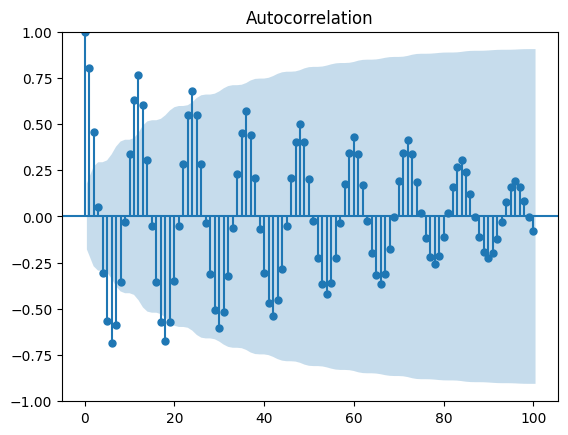

In [17]:
acf_plot = plot_acf(df_ice_cream.sales, lags=100)

### GRADUAL decrease in ACF shows that Auto-Regressive Process can be favorable

# PACF (Partial Auto Correlation Function)

/Users/mac/venv/py38/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


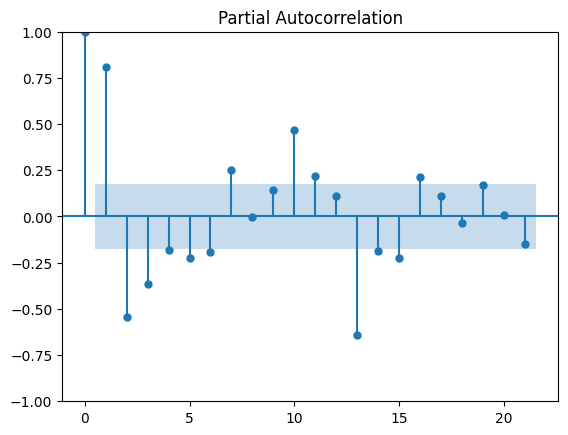

In [18]:
pacf_plot = plot_pacf(df_ice_cream.sales)

### SHARP decrease in PACF also indicate the possibility of AR Process

# STOCK Data

In [1]:
import yfinance as yf

In [2]:
ticker_data = yf.Ticker('SPY')

In [3]:
#get the historical prices for this ticker
tickerDf = ticker_data.history(period='1d', start='2015-1-1', end='2020-1-1')

In [4]:
tickerDf = tickerDf[['Close']]

In [5]:
#see your data
tickerDf.head()


,Close
Date,
2015-01-02 00:00:00-05:00,177.463593
2015-01-05 00:00:00-05:00,174.258698
2015-01-06 00:00:00-05:00,172.617294
2015-01-07 00:00:00-05:00,174.768372
2015-01-08 00:00:00-05:00,177.869629


In [8]:
tickerSymbol = 'SPY'

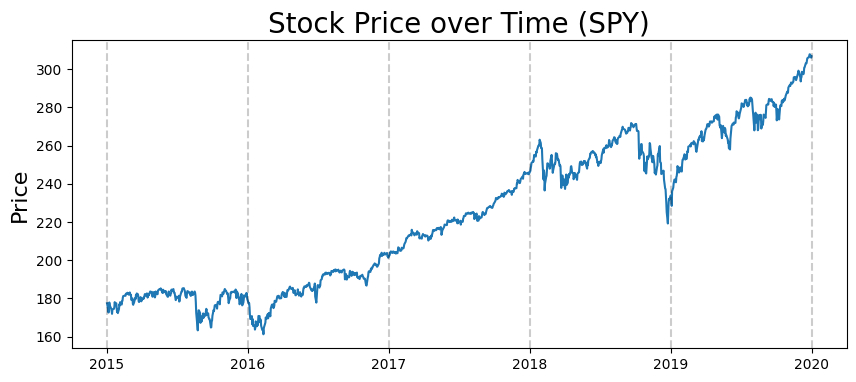

In [9]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Stationarity: take first difference of this series

In [10]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [11]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [12]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,177.463593,-3.204895
2015-01-05 00:00:00-05:00,174.258698,-1.641403
2015-01-06 00:00:00-05:00,172.617294,2.151077
2015-01-07 00:00:00-05:00,174.768372,3.101257
2015-01-08 00:00:00-05:00,177.869629,-1.425369


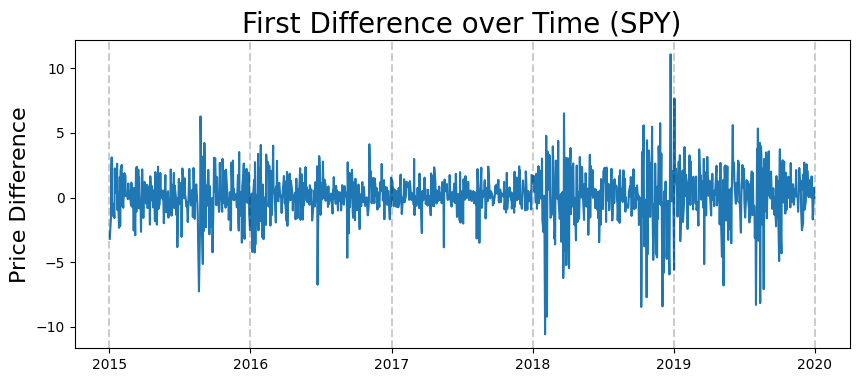

In [13]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF and PACF

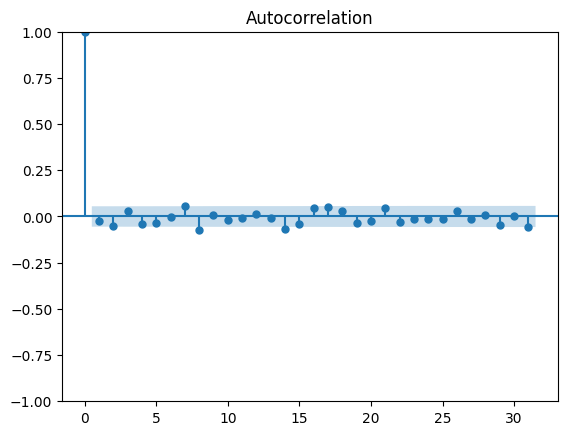

In [14]:
acf_plot = plot_acf(tickerDf.FirstDifference)

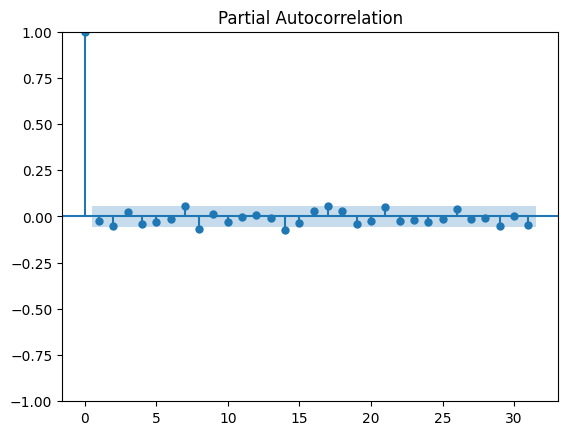

In [16]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

## In this case Neither ACF or PACF is useful... Need to look for other tools